<a href="https://colab.research.google.com/github/nou321/PFE_Nour/blob/main/CnnAug_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1- importer les bibliothéques

In [ ]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

## 2- fixer les path des données augmenter (zoom, rotation,translation,flipped)


In [ ]:

from google.colab import drive
drive.mount('/content/drive')
sj_fliped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped'
sj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_zoom'
sj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_rotation'
sj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_translation'
sj_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_distortion'
sj_rot_trans_flip='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped_rotation_translation'
sj_flip_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped_distortion'

nsj_fliped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped'
nsj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_zoom'
nsj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_rotation'
nsj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_translation'
nsj_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_distortion'
nsj_rot_trans_flip='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped_rotation_translation'
nsj_flip_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped_distortion'

Mounted at /content/drive


In [ ]:
sj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj'
nsj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj'

## Mise en Forme des images

In [ ]:
def mise_tenseur (path, nl, nc,pl):
    images_liste = os.listdir(path)
    images_liste.sort()
    print(images_liste)
    Nb_images = len(images_liste)
    tenseur = np.empty((Nb_images, nl, nc, pl), dtype=np.uint8)
    k = 0
    for im in images_liste:
       
        img = imread(path+'/'+im)
        tenseur[k, :, :, 0] = img
        k +=1
    return(tenseur)

In [ ]:
sj_original=mise_tenseur(sj_path,64,64,1)
nsj_original=mise_tenseur(nsj_path,64,64,1)

['001.jpg', '002.jpg', '003.jpg', '009.jpg', '011.jpg', '013.jpg', '015.jpg', '019.jpg', '020.jpg', '022.jpg', '023.jpg', '025.jpg', '027.jpg', '028.jpg', '030.jpg', '031.jpg', '032.jpg', '035.jpg', '036.jpg', '037.jpg', '044.jpg', '045.jpg', '046.jpg', '047.jpg', '048.jpg', '049.jpg', '050.jpg', '052.jpg', '053.jpg', '054.jpg', '055.jpg', '056.jpg', '059.jpg', '060.jpg', '061.jpg', '067.jpg', '069.jpg', '070.jpg', '071.jpg', '072.jpg', '073.jpg', '074.jpg', '076.jpg', '077.jpg', '078.jpg', '080.jpg', '085.jpg', '086.jpg', '087.jpg', '089.jpg', '090.jpg', '093.jpg', '097.jpg', '098.jpg', '103.jpg', '104.jpg', '109.jpg', '110.jpg', '115.jpg', '117.jpg', '118.jpg', '119.jpg', '120.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '127.jpg', '128.jpg', '129.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '139.jpg', '140.jpg', '142.jpg', '149.jpg', '153.jpg', '155.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '169.jpg', '174.jpg', '176.jpg'

In [ ]:
flipped_data= mise_tenseur(sj_fliped, 64, 64,1)
zoom_data=mise_tenseur(sj_zoom,64,64,1)
rotate_data=mise_tenseur(sj_rotation,64,64,1)
translate_data=mise_tenseur(sj_translation,64,64,1)
distortion_data=mise_tenseur(sj_distortion,64,64,1)
flip_dist_data=mise_tenseur(sj_flip_distortion,64,64,1)
rot_trans_flip_data=mise_tenseur(sj_rot_trans_flip,64,64,1)



['001_Hfliped.jpg', '002_Hfliped.jpg', '003_Hfliped.jpg', '009_Hfliped.jpg', '011_Hfliped.jpg', '013_Hfliped.jpg', '015_Hfliped.jpg', '019_Hfliped.jpg', '020_Hfliped.jpg', '022_Hfliped.jpg', '023_Hfliped.jpg', '025_Hfliped.jpg', '027_Hfliped.jpg', '028_Hfliped.jpg', '030_Hfliped.jpg', '031_Hfliped.jpg', '032_Hfliped.jpg', '035_Hfliped.jpg', '036_Hfliped.jpg', '037_Hfliped.jpg', '044_Hfliped.jpg', '045_Hfliped.jpg', '046_Hfliped.jpg', '047_Hfliped.jpg', '048_Hfliped.jpg', '049_Hfliped.jpg', '050_Hfliped.jpg', '052_Hfliped.jpg', '053_Hfliped.jpg', '054_Hfliped.jpg', '055_Hfliped.jpg', '056_Hfliped.jpg', '059_Hfliped.jpg', '060_Hfliped.jpg', '061_Hfliped.jpg', '067_Hfliped.jpg', '069_Hfliped.jpg', '070_Hfliped.jpg', '071_Hfliped.jpg', '072_Hfliped.jpg', '073_Hfliped.jpg', '074_Hfliped.jpg', '076_Hfliped.jpg', '077_Hfliped.jpg', '078_Hfliped.jpg', '080_Hfliped.jpg', '085_Hfliped.jpg', '086_Hfliped.jpg', '087_Hfliped.jpg', '089_Hfliped.jpg', '090_Hfliped.jpg', '093_Hfliped.jpg', '097_Hflipe

In [ ]:
sj_data = []
sj_data.extend(rotate_data)
sj_data.extend(flipped_data)
sj_data.extend(zoom_data)
sj_data.extend(translate_data)
sj_data.extend(distortion_data)
sj_data.extend(rot_trans_flip_data)
sj_data.extend(flip_dist_data)


In [ ]:
len(sj_data)

1610

In [ ]:
flipped_data_nsj= mise_tenseur(nsj_fliped, 64, 64,1)
zoom_data_nsj=mise_tenseur(nsj_zoom,64,64,1)
rotate_data_nsj=mise_tenseur(nsj_rotation,64,64,1)
translate_data_nsj=mise_tenseur(nsj_translation,64,64,1)
distortion_data_nsj=mise_tenseur(nsj_distortion,64,64,1)
flip_dist_data_nsj=mise_tenseur(nsj_flip_distortion,64,64,1)
rot_trans_flip_data_nsj=mise_tenseur(nsj_rot_trans_flip,64,64,1)



['004_Hfliped.jpg', '005_Hfliped.jpg', '006_Hfliped.jpg', '007_Hfliped.jpg', '008_Hfliped.jpg', '010_Hfliped.jpg', '012_Hfliped.jpg', '014_Hfliped.jpg', '016_Hfliped.jpg', '017_Hfliped.jpg', '018_Hfliped.jpg', '021_Hfliped.jpg', '024_Hfliped.jpg', '026_Hfliped.jpg', '029_Hfliped.jpg', '033_Hfliped.jpg', '034_Hfliped.jpg', '038_Hfliped.jpg', '039_Hfliped.jpg', '040_Hfliped.jpg', '041_Hfliped.jpg', '042_Hfliped.jpg', '043_Hfliped.jpg', '051_Hfliped.jpg', '057_Hfliped.jpg', '058_Hfliped.jpg', '062_Hfliped.jpg', '063_Hfliped.jpg', '064_Hfliped.jpg', '065_Hfliped.jpg', '066_Hfliped.jpg', '068_Hfliped.jpg', '075_Hfliped.jpg', '079_Hfliped.jpg', '081_Hfliped.jpg', '082_Hfliped.jpg', '083_Hfliped.jpg', '084_Hfliped.jpg', '088_Hfliped.jpg', '091_Hfliped.jpg', '092_Hfliped.jpg', '094_Hfliped.jpg', '095_Hfliped.jpg', '096_Hfliped.jpg', '099_Hfliped.jpg', '100_Hfliped.jpg', '101_Hfliped.jpg', '102_Hfliped.jpg', '105_Hfliped.jpg', '106_Hfliped.jpg', '107_Hfliped.jpg', '108_Hfliped.jpg', '111_Hflipe

In [ ]:
nsj_data = []
nsj_data.extend(rotate_data_nsj)
nsj_data.extend(flipped_data_nsj)
nsj_data.extend(rot_trans_flip_data_nsj)
nsj_data.extend(zoom_data_nsj)
nsj_data.extend(distortion_data_nsj)
nsj_data.extend(translate_data_nsj)
nsj_data.extend(flip_dist_data_nsj)

len(nsj_data)

1540

In [ ]:
labels1 = [0] * len(nsj_data)  # labels pour la première classe (0)
labels2 = [1] * len(sj_data)  # labels pour la deuxième classe (1)

# Fusionner les données et les labels en un seul tableau multidimensionnel
data = np.concatenate([nsj_data, sj_data])
print(len(data))
labels = np.concatenate([labels1, labels2])
len(labels)


3150


3150

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# normaliser les données 
x_train = x_train.reshape(x_train.shape[0], 64,64, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 64,64, 1).astype('float32') / 255

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape = (64,64,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(8,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 6, 6, 16)        

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy
              ,metrics=[keras.metrics.Recall()])

In [ ]:
#affichage de fnct loss +accuracy
H2 = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=150, batch_size=10,callbacks=[callback])

Epoch 1/150
252/252 [==============================] - 6s 7ms/step - loss: 0.6921 - recall_3: 0.7191 - val_loss: 0.7210 - val_recall_3: 1.0000
Epoch 2/150
252/252 [==============================] - 2s 6ms/step - loss: 0.6825 - recall_3: 0.6285 - val_loss: 0.6478 - val_recall_3: 0.4463
Epoch 3/150
252/252 [==============================] - 1s 6ms/step - loss: 0.6624 - recall_3: 0.7122 - val_loss: 0.6216 - val_recall_3: 0.6221
Epoch 4/150
252/252 [==============================] - 2s 6ms/step - loss: 0.6455 - recall_3: 0.6477 - val_loss: 0.6277 - val_recall_3: 0.7459
Epoch 5/150
252/252 [==============================] - 2s 7ms/step - loss: 0.6365 - recall_3: 0.6746 - val_loss: 0.6380 - val_recall_3: 0.4039
Epoch 6/150
252/252 [==============================] - 2s 6ms/step - loss: 0.6153 - recall_3: 0.6922 - val_loss: 0.5971 - val_recall_3: 0.5309
Epoch 7/150
252/252 [==============================] - 2s 8ms/step - loss: 0.5671 - recall_3: 0.7045 - val_loss: 0.5960 - val_recall_3: 0.4495

dict_keys(['loss', 'recall_3', 'val_loss', 'val_recall_3'])


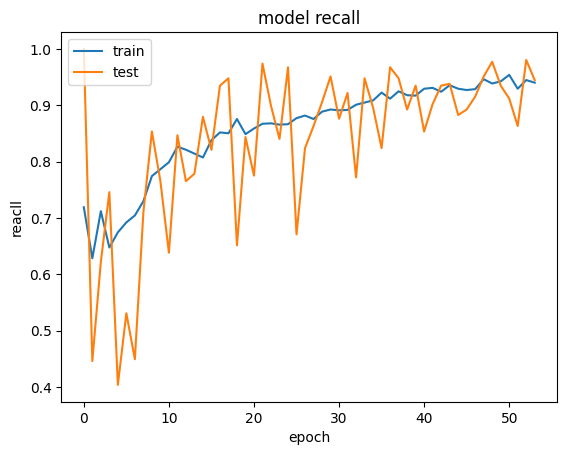

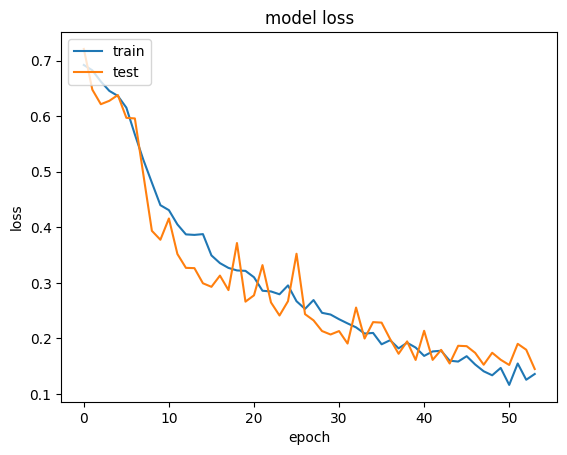

In [ ]:
print(H2.history.keys())
# accuracy
plt.plot(H2.history['recall_3'])
plt.plot(H2.history['val_recall_3'])
plt.title('model recall')
plt.ylabel('reacll')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#recall 

#loss
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#runing the model on a new dataset(test_Ds)
scores = model.evaluate(x_test,y_test)

20/20 [==============================] - 2s 30ms/step - loss: 0.1451 - recall_3: 0.9446


In [ ]:
# Récupérer les poids du modèle existant
weights = model.get_weights()

# Initialiser le nouveau modèle avec les mêmes couches que le modèle existant
model2 = Sequential()
model2.add(Conv2D(32,(3,3),activation='relu', input_shape = (64,64,1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(32, kernel_size = (3,3),activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(16, kernel_size = (3,3),activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(8,(3,3),activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

# Définir les poids du nouveau modèle avec ceux du modèle existant
model2.set_weights(weights)

In [ ]:
callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model2.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy
              ,metrics=[keras.metrics.Recall()])

In [ ]:
# diviser la base en 2
nsj_org_data=nsj_original[0:55]
sj_org_data=sj_original[0:57]
label_nsj = [0] * len(nsj_org_data)  # labels pour la première classe (0)
label_sj = [1] * len(sj_org_data)  # labels pour la deuxième classe (1)
# Fusionner les données et les labels en un seul tableau multidimensionnel
data2 = np.concatenate([nsj_org_data, sj_org_data])
print(len(data2))
labels2 = np.concatenate([label_nsj, label_sj])
len(labels2)


112


112

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(data2, labels2, test_size=0.2, random_state=42)
# normaliser les données 
x_train2 = x_train2.reshape(x_train2.shape[0], 64,64, 1).astype('float32') / 255
x_test2= x_test2.reshape(x_test2.shape[0], 64,64, 1).astype('float32') / 255

In [ ]:
#affichage de fnct loss +accuracy
History = model.fit(x_train2, y_train2, validation_data= (x_test2, y_test2), epochs=150, batch_size=10,callbacks=[callback2])

Epoch 1/150
9/9 [==============================] - 1s 72ms/step - loss: 0.0866 - recall_3: 0.9583 - val_loss: 0.0423 - val_recall_3: 1.0000
Epoch 2/150
9/9 [==============================] - 0s 9ms/step - loss: 0.0445 - recall_3: 1.0000 - val_loss: 0.0320 - val_recall_3: 1.0000
Epoch 3/150
9/9 [==============================] - 0s 10ms/step - loss: 0.0606 - recall_3: 0.9792 - val_loss: 0.0648 - val_recall_3: 1.0000
Epoch 4/150
9/9 [==============================] - 0s 11ms/step - loss: 0.0299 - recall_3: 1.0000 - val_loss: 0.1082 - val_recall_3: 1.0000
Epoch 5/150
9/9 [==============================] - 0s 9ms/step - loss: 0.0479 - recall_3: 1.0000 - val_loss: 0.0658 - val_recall_3: 1.0000
Epoch 6/150
9/9 [==============================] - 0s 9ms/step - loss: 0.0865 - recall_3: 0.9583 - val_loss: 0.0487 - val_recall_3: 1.0000
Epoch 7/150
9/9 [==============================] - 0s 9ms/step - loss: 0.0119 - recall_3: 1.0000 - val_loss: 0.0188 - val_recall_3: 1.0000
Epoch 8/150
9/9 [=======

dict_keys(['loss', 'recall_3', 'val_loss', 'val_recall_3'])


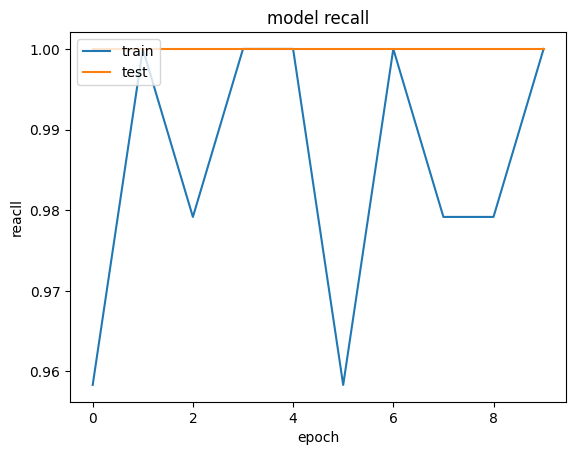

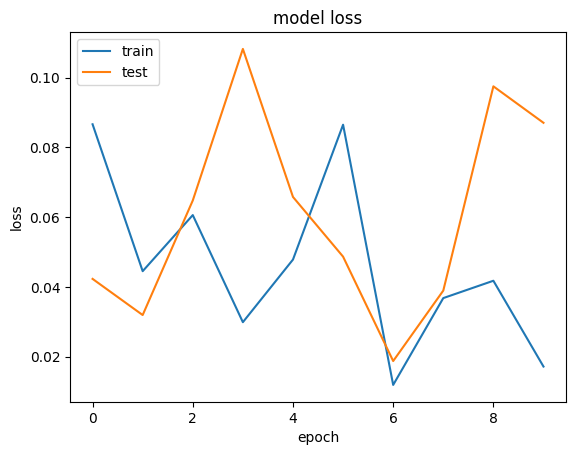

In [ ]:
print(History.history.keys())
# accuracy
plt.plot(History.history['recall_3'])
plt.plot(History.history['val_recall_3'])
plt.title('model recall')
plt.ylabel('reacll')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#recall 

#loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()